In [1]:
# 모듈 생성
import csv
import platform
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [2]:
%pwd 

'C:\\hcb\\pandas_study\\week4\\TeamProject'

In [3]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0AA0-A41A

 C:\hcb\pandas_study\week4\TeamProject 디렉터리

2022-07-20  오전 10:59    <DIR>          .
2022-07-20  오전 10:59    <DIR>          ..
2022-07-20  오전 10:59    <DIR>          .ipynb_checkpoints
2022-07-20  오전 09:20             2,533 2조 발표 제안서.ipynb
2022-07-20  오전 09:14             8,865 4주차 팀플_전처리.ipynb
2022-07-20  오전 08:42            79,246 4주차_팀플 (일단 옮김 완료).ipynb
2022-07-20  오전 10:58    <DIR>          data
2022-07-20  오전 02:42            21,585 flight_staff.ipynb
2022-07-20  오전 09:07    <DIR>          Fonts
2022-07-20  오전 09:05             2,311 sightseeing.ipynb
2022-07-20  오전 10:59           139,801 teamproject_week4 (수정중).ipynb
2022-07-20  오전 10:59           139,804 teamproject_week4 (원본).ipynb
2022-07-20  오전 10:02            64,002 teamproject_week4 (원본)-Copy111111.ipynb
2022-07-20  오전 09:53            67,711 teamproject_week4-Copy1.ipynb
               9개 파일             525,858 바이트
               5개 디렉터리  170,485,743,616 바이트 남음


### 연간 국제 유가 데이터 file

In [4]:
inter_oil_price_year = pd.read_csv('./data/inter_oil_price_year.csv', encoding='utf-8')
inter_oil_price_year.columns
inter_oil_price_year
inter_oil_price_year['유가']

0     715.837538
1     716.119679
2     635.935833
3     361.830046
4     315.390772
5     376.262744
6     475.866206
7     451.288213
8     307.388137
9     501.496667
10    799.833350
Name: 유가, dtype: float64

### 연도별 국제 항공수송실적 file

In [5]:
inter_air_trans = pd.read_csv('./data/inter_air_trans_year_01.csv', encoding='euc_kr')
print(inter_air_trans.columns)
inter_air_trans.head()

Index(['구분', '여객(명)', '여객킬로(Km)', '화물(톤)', '화물톤킬로(Km)', '운항(회)', '운항킬로(Km)'], dtype='object')


,구분,여객(명),여객킬로(Km),화물(톤),화물톤킬로(Km),운항(회),운항킬로(Km)
0,1989,"8,283,164","29,795,423,539","711,295","4,268,280,900","44,219","212,959,283"
1,1990,"9,626,415","36,405,075,593","776,759","4,554,913,269","53,442","249,721,301"
2,1991,"10,270,666","38,521,435,036","787,342","4,470,003,436","59,927","267,728,140"
3,1992,"11,257,011","45,220,452,753","837,215","4,968,222,114","66,363","307,090,481"
4,1993,"11,651,345","47,627,320,253","950,574","6,182,815,941","68,615","324,066,393"


In [6]:
# 필요없는 행과 열 삭제
inter_air_trans.drop(['여객킬로(Km)','화물톤킬로(Km)','운항킬로(Km)'], axis=1, inplace=True)
inter_air_trans.drop(labels=range(0, 23), axis = 0, inplace=True)
inter_air_trans

,구분,여객(명),화물(톤),운항(회)
23,2012,"47,702,644","3,208,780","313,726"
24,2013,"50,986,891","3,246,253","338,988"
25,2014,"56,778,759","3,410,742","366,485"
26,2015,"61,434,404","3,518,772","388,008"
27,2016,"73,000,810","3,780,908","438,856"
28,2017,"76,955,719","4,031,516","457,099"
29,2018,"85,925,288","4,168,783","497,089"
30,2019,"90,385,640","4,015,987","528,243"
31,2020,"14,239,922","3,070,993","167,211"
32,2021,"3,208,695","3,420,163","131,442"


In [7]:
# 유가 컬럼 추가
inter_oil_price_year = inter_oil_price_year.drop(10)
aa = inter_oil_price_year['유가'].tolist()
inter_air_trans['유가'] = aa

In [8]:
# 컬럼명 수정
inter_air_trans.rename({'구분':'연도','유가': '유가(원/배럴)'}, axis=1, inplace=True)

In [9]:
# 인덱스 정리
inter_air_trans_1 = inter_air_trans.set_index('연도')
inter_air_trans = inter_air_trans_1.reset_index()

In [10]:
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴)
0,2012,"47,702,644","3,208,780","313,726",715.837538
1,2013,"50,986,891","3,246,253","338,988",716.119679
2,2014,"56,778,759","3,410,742","366,485",635.935833
3,2015,"61,434,404","3,518,772","388,008",361.830046
4,2016,"73,000,810","3,780,908","438,856",315.390772
5,2017,"76,955,719","4,031,516","457,099",376.262744
6,2018,"85,925,288","4,168,783","497,089",475.866206
7,2019,"90,385,640","4,015,987","528,243",451.288213
8,2020,"14,239,922","3,070,993","167,211",307.388137
9,2021,"3,208,695","3,420,163","131,442",501.496667


### 연간 등록 숙박시설 file

In [11]:
stay_regit_year_2021 = pd.read_csv('./data/stay_regit_year_2021.csv', encoding='euc_kr', skiprows=3)
stay_regit_year_2021.drop(['Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'], axis=1, inplace=True)
stay_regit_year_2021

,Unnamed: 0,Unnamed: 1,소계,호텔업,휴양콘도미니엄업,관광펜션업,한옥체험업,외국인도시민박업,계,일반숙박업,생활숙박업,농어촌민박업,유스호스텔,휴양펜션업,Unnamed: 14
0,2012년\n(12.31기준),업체수,"2,036",786,180,297,516,257,"26,319","25,453",866,"18,398",108,59,"46,920"
1,NaN,(%),4.3,NaN,NaN,NaN,NaN,NaN,56.1,NaN,NaN,39.2,0.2,0.1,100.0
2,NaN,객실수,"126,760","82,209","38,971","2,640","2,255",685,"577,186","557,209","19,977","68,219","10,959",504,"783,628"
3,NaN,(%),16.2,NaN,NaN,NaN,NaN,NaN,73.7,NaN,NaN,8.7,1.4,0.1,99.9
4,2013년\n(12.31기준),업체수,"2,666",896,192,332,695,551,"26,828","25,659","1,169","20,047",112,79,"49,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,NaN,객실수,"33,889","23,871","9,105",913,-,-,"26,872","20,426","6,446","12,429",917,913,"75,020"
431,2020년\n(12.31.기준),업체수,422,363,59,-,-,-,835,649,186,"4,484",19,108,"5,868"
432,NaN,객실수,"29,228","20,195","9,033",-,-,-,"27,419","20,295","7,124","12,566",917,932,"71,062"
433,2021년\n(12.31.기준),업체수,423,362,60,-,1,-,866,647,219,"4,750",17,110,"6,166"


In [12]:
# 필요한 자료를 얻기 위해 컬럼 정리
stay_regit_year_2021 = stay_regit_year_2021.iloc[0:40:4]

In [13]:
# 컬럼명 정리
stay_regit_year_2021 = stay_regit_year_2021.rename({'Unnamed: 0':'연도','Unnamed: 1':'업체수','계':'소계','Unnamed: 14':'총계'}, axis=1)
stay_regit_year_2021

# 인덱스 정리
stay_regit_year_2021 = stay_regit_year_2021.set_index('연도')
stay_regit_year_2021 = stay_regit_year_2021.reset_index()

In [14]:
# 10년치 연도 리스트 담아둔 것
ten_year = []
for i in range(2012, 2022):
    ten_year.append(str(i))
ten_year

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [15]:
# 연도 컬럼 정리
stay_regit_year_2021['연도'] = ten_year

# 총계 컬럼만 떼어 내야겠다고 판단
stay_regit_year_2021_total = stay_regit_year_2021['총계']

In [16]:
# 총계(업체수) 컬럼 추가
inter_air_trans['총 업체수'] = stay_regit_year_2021_total

In [17]:
# 컬럼명 정리
inter_air_trans = inter_air_trans.rename({'총 업체수':'숙박 업체수(개)'}, axis=1)
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,"47,702,644","3,208,780","313,726",715.837538,"46,920"
1,2013,"50,986,891","3,246,253","338,988",716.119679,"49,732"
2,2014,"56,778,759","3,410,742","366,485",635.935833,"53,777"
3,2015,"61,434,404","3,518,772","388,008",361.830046,"56,915"
4,2016,"73,000,810","3,780,908","438,856",315.390772,"58,591"
5,2017,"76,955,719","4,031,516","457,099",376.262744,"59,995"
6,2018,"85,925,288","4,168,783","497,089",475.866206,"62,045"
7,2019,"90,385,640","4,015,987","528,243",451.288213,"62,957"
8,2020,"14,239,922","3,070,993","167,211",307.388137,"62,212"
9,2021,"3,208,695","3,420,163","131,442",501.496667,"68,773"


In [18]:
# 데이터들 타입 정리
inter_air_trans['여객(명)'] = inter_air_trans['여객(명)'].str.replace(',','').astype('int')
inter_air_trans['화물(톤)'] = inter_air_trans['화물(톤)'].str.replace(',','').astype('int')
inter_air_trans['운항(회)'] = inter_air_trans['운항(회)'].str.replace(',','').astype('int')
inter_air_trans['숙박 업체수(개)'] = inter_air_trans['숙박 업체수(개)'].str.replace(',','').astype('int')

In [19]:
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,715.837538,46920
1,2013,50986891,3246253,338988,716.119679,49732
2,2014,56778759,3410742,366485,635.935833,53777
3,2015,61434404,3518772,388008,361.830046,56915
4,2016,73000810,3780908,438856,315.390772,58591
5,2017,76955719,4031516,457099,376.262744,59995
6,2018,85925288,4168783,497089,475.866206,62045
7,2019,90385640,4015987,528243,451.288213,62957
8,2020,14239922,3070993,167211,307.388137,62212
9,2021,3208695,3420163,131442,501.496667,68773


In [20]:
# 정리된 DF, csv로 저장 => 소수의 경우, 소수점 2번째까지 나타나도록 파일을 내보냄
inter_air_trans.to_csv('C:\hcb\pandas_study\week4\TeamProject\data\inter_air_trans_fin.csv', index=False, float_format = '%.2f')

In [21]:
# 이외 다른 파일들 전처리 과정은 한군데 몰아서 실시, csv 파일로 보낸 것들 불러오기

### 남은 파일 불러오기 (국내 항공 운송 현황, 업체별 항공 종사자 file)

In [22]:
sightseeing = pd.read_csv('./data/sightseeing_fin.csv', encoding='utf-8')
inter_air_trans_2 = pd.read_csv('./data/inter_air_trans_2_fin.csv', encoding='utf-8')

## 그래프 분석
## 1) 항공사  

### (1) 유가의 변동과 여객/화물/운항의 변동

In [23]:
inter_air_trans_1 = inter_air_trans
inter_air_trans_1

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,715.837538,46920
1,2013,50986891,3246253,338988,716.119679,49732
2,2014,56778759,3410742,366485,635.935833,53777
3,2015,61434404,3518772,388008,361.830046,56915
4,2016,73000810,3780908,438856,315.390772,58591
5,2017,76955719,4031516,457099,376.262744,59995
6,2018,85925288,4168783,497089,475.866206,62045
7,2019,90385640,4015987,528243,451.288213,62957
8,2020,14239922,3070993,167211,307.388137,62212
9,2021,3208695,3420163,131442,501.496667,68773


In [24]:
inter_air_trans_1['연도'] = inter_air_trans_1['연도'].astype('str')

In [25]:
b = inter_air_trans_1['연도'].tolist()
x1 = inter_air_trans_1['여객(명)'].tolist()
x2 = inter_air_trans_1['화물(톤)'].tolist()
x3 = inter_air_trans_1['운항(회)'].tolist()
o1 = inter_air_trans_1['유가(원/배럴)'].tolist()

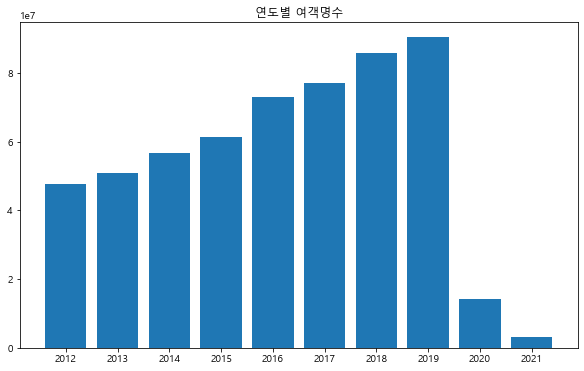

In [26]:
if platform.system() == 'Windows':
    font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
    plt.rc('font', family=font_name)
# plt.rc(‘font’, family=‘Malgun Gothic’, size=8) # 간단히 맑은 고딕으로 설정
else:
# MacOS
    plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS

plt.figure(figsize=(10, 6))
plt.title('연도별 여객명수')
plt.bar(b, x1)
plt.show()

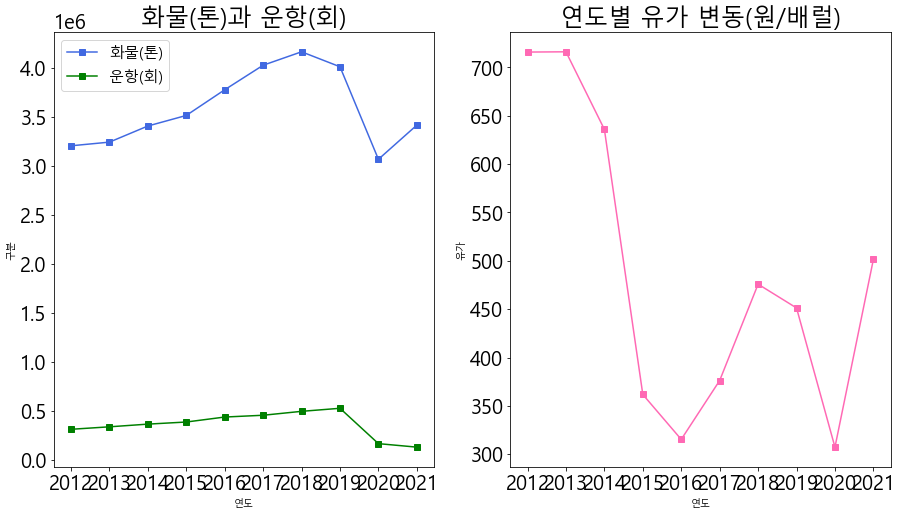

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(b, x2, 'royalblue', marker='s', label='화물(톤)')
plt.plot(b, x3, 'green', marker='s', label='운항(회)')
plt.rc('font', size=20)   
plt.ylabel('구분', fontsize='10')
plt.xlabel('연도', fontsize='10')
plt.title('화물(톤)과 운항(회)')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.legend(fontsize=15)
# plt.show()

plt.subplot(1,2,2)
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='10')
plt.xlabel('연도', fontsize='10')
plt.show()

In [28]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

In [29]:
sightseeing

,업종,구분,2016,2017,2018,2019,2020
0,여행업,사업체 수,16605,19944,19039,18223,16660
1,여행업,종사자 수,98421,107209,99077,103311,61784
2,여행업,매출액(억원),76427,81134,84622,86271,4354
3,관광숙박업,사업체 수,1716,1843,2110,2218,2223
4,관광숙박업,종사자 수,73631,71769,69926,70658,49930
5,관광숙박업,매출액(억원),82683,84112,76644,83628,39613
6,관광객 이용시설업,사업체 수,3168,3963,4323,4657,6079
7,관광객 이용시설업,종사자 수,17421,25535,23154,23863,19752
8,관광객 이용시설업,매출액(억원),8852,11039,10207,10837,6515
9,국제회의업,사업체 수,700,890,886,1040,1110


In [30]:
# 업종별 사업체수
sightseeing_01 = sightseeing.iloc[0::3]
sightseeing_01

,업종,구분,2016,2017,2018,2019,2020
0,여행업,사업체 수,16605,19944,19039,18223,16660
3,관광숙박업,사업체 수,1716,1843,2110,2218,2223
6,관광객 이용시설업,사업체 수,3168,3963,4323,4657,6079
9,국제회의업,사업체 수,700,890,886,1040,1110
12,카지노업,사업체 수,17,17,17,17,17
15,유원시설업,사업체 수,1782,2548,3000,2981,2689
18,관광편의시설업,사업체 수,3708,3884,4077,4189,3237
21,전체 합계,종사자 수,261978,282561,267561,275619,191524


In [31]:
sightseeing_01.set_index(['업종','구분']).T

업종,여행업,관광숙박업,관광객 이용시설업,국제회의업,카지노업,유원시설업,관광편의시설업,전체 합계
구분,사업체 수,사업체 수,사업체 수,사업체 수,사업체 수,사업체 수,사업체 수,종사자 수
2016,16605,1716,3168,700,17,1782,3708,261978
2017,19944,1843,3963,890,17,2548,3884,282561
2018,19039,2110,4323,886,17,3000,4077,267561
2019,18223,2218,4657,1040,17,2981,4189,275619
2020,16660,2223,6079,1110,17,2689,3237,191524


In [32]:
stay_regit_year_2021 = stay_regit_year_2021.iloc[0:40:4]